## Day 9

https://adventofcode.com/2021/day/9

In [1]:
def readInput9(filename):
    with open(filename) as f:
        return [ [ int(n) for n in l.strip("\n")]  for l in f.readlines() ] 

i0 = readInput9("./data/day09test1.txt")
i1 = readInput9("./data/input09.txt")

### Part 1

In [2]:
def adiac(X,lenX,lenY):
    x,y = X
    return [ (x+dx,y+dy) for dx in (-1,0,1) for dy in (-1,0,1) if (x+dx,y+dy)!=X and abs(dx+dy)==1 and 0<=x+dx<lenX and 0<=y+dy<lenY ]

def lowPoints(i0):
    lowPoints = []
    for y in range(len(i0)):
        for x in range(len(i0[0])):
            X = (x,y)
            isLowPoint = True
            for N in adiac(X,len(i0[0]),len(i0)):
                xN,yN = N
                isLowPoint = isLowPoint and i0[yN][xN]>i0[y][x]
            if isLowPoint:
                lowPoints.append(X)
    return lowPoints

def risk(i0):
    risk = 0
    for X in lowPoints(i0):
        x,y = X
        risk += 1 + i0[y][x]
    return risk

print("Test 1:",risk(i0))
print("Part 1:",risk(i1)) 

Test 1: 15
Part 1: 448


### Part 2

Locations of height 9 define the basin boundaries!

In [5]:
import numpy as np
from functools import reduce
from operator import mul
from copy import deepcopy

def defineBorders(i0):
    b0 = deepcopy(i0)
    for y in range(len(b0)):
        for x in range(len(b0[0])):
            if i0[y][x]==9:
                b0[y][x] = 0
            else:
                b0[y][x] = 1  
    return b0

def floodfill(matrix, x, y, value):
    '''recursive implementation of floodfill algorithm, ignoring diagonals'''
    if matrix[y][x] == 1:  
        matrix[y][x] = value 
        if x > 0:
            floodfill(matrix,x-1,y,value)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y,value)
        if y > 0:
            floodfill(matrix,x,y-1,value)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1,value)
            
def fillBasins(b0):
    filled = deepcopy(b0)
    ifill = 2 
    for y in range(len(filled)):
        for x in range(len(filled[0])):
            if filled[y][x]==1:
                floodfill(filled, x, y, ifill)
                ifill +=1
    return filled

def countBasins(filled_):
    filled = np.array(filled_)
    basval = sorted([ sum(filled[filled==b])//b for b in np.unique(filled) if b!=0 ])
    return reduce(mul, basval[-3:], 1)

In [6]:
f0 = fillBasins(defineBorders(i0))
print("Test 2:",countBasins(f0))

f1 = fillBasins(defineBorders(i1))
print("Part 2:",countBasins(f1))

Test 2: 1134
Part 2: 1417248


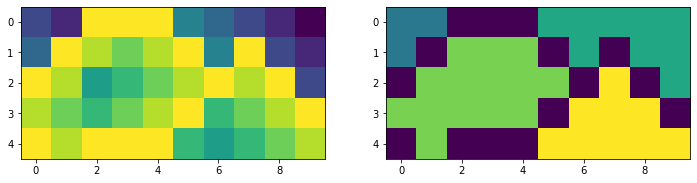

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(i0)
ax[1].imshow(f0)

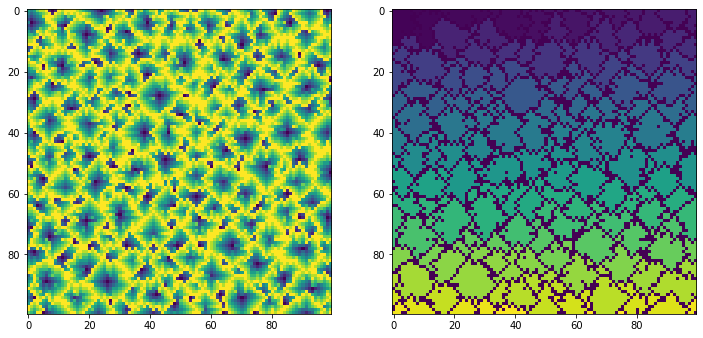

In [8]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(i1)
ax[1].imshow(f1)